## Python Data Analysis Project - <font color=red>Sales Data Analysis </font>

 ### <font color=red>Instructions for running the notebook</font>
 - Paste the Jupyter Notebook File in the same folder as your csv files
 - Before running the notebook, check for a *combined_csv.csv* file in the folder
     - If such a file exists, delete it before proceeding
 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

### Merging Files

In [2]:
extension = 'csv'
all_files = [i for i in glob.glob('*.{}'.format(extension))]

In [3]:
print(all_files)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [4]:
combined_csv = pd.concat([pd.read_csv(f) for f in all_files])

In [5]:
combined_csv.to_csv("combined_csv.csv", index = False, encoding='utf-8-sig')

In [6]:
all_data = pd.read_csv('combined_csv.csv') # All files combined and read in a single file

In [7]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning up Data

##### Dropping rows of NaN

In [8]:
nan_df = all_data[all_data.isnull().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
all_data = all_data.dropna(how='all') # dropping the null rows/records

In [10]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
all_data['Month'] = all_data['Order Date'].str[0:2]

In [12]:
all_data['Month'].unique()

array(['04', '05', 'Or', '08', '09', '12', '01', '02', '03', '07', '06',
       '11', '10'], dtype=object)

##### Removing Duplicated Headers

In [13]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


### Augumenting new column(s)

##### Adding Month Column

In [15]:
all_data['Month'] = all_data['Month'].astype('int32')

In [16]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

##### Adding Sales(Quantity * Price) Column

In [17]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float64')

In [18]:
all_data['Sale Value'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Value
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Adding a city and state column

In [19]:
temp_add_df = all_data['Purchase Address'].str.split(',', n=0, expand=True) #Temp address DataFrame
state_series = temp_add_df[2]
all_data['City'] = temp_add_df[1] + ' ' + state_series.str.split(expand=True)[0]
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Value,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [20]:
sale_performance_month = all_data.groupby('Month').sum()
sale_performance_city = all_data.groupby('City').sum()

In [21]:
sale_performance_month

,Quantity Ordered,Price Each,Sale Value
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


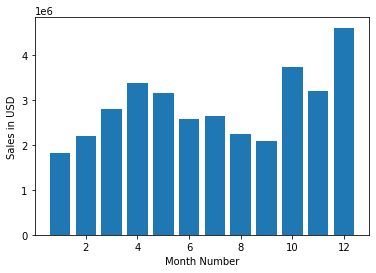

In [22]:
months = range(1, 13)

plt.bar(months, sale_performance_month['Sale Value'])
plt.ylabel('Sales in USD')
plt.xlabel('Month Number')
plt.show()

#### So, we conclude that December was the best month for sales

In [23]:
sale_performance_city

,Quantity Ordered,Price Each,Month,Sale Value
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


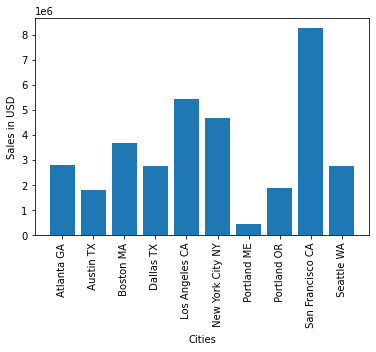

In [24]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, sale_performance_city['Sale Value'])
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in USD')
plt.xlabel('Cities')
plt.show()

#### So, we conclude that San Francisco CA has the highest Sales

In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Value,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


### Converting to DateTime type


In [26]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [27]:
all_data['Order Hour'] = all_data['Order Date'].dt.hour
all_data['Order Minute'] = all_data['Order Date'].dt.minute

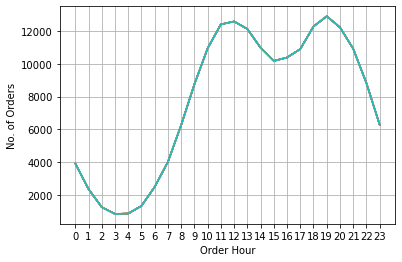

In [28]:
hours = [hour for hour, df in all_data.groupby('Order Hour')]

plt.plot(hours, all_data.groupby(['Order Hour']).count())
plt.xticks(hours)
plt.xlabel('Order Hour')
plt.ylabel('No. of Orders')
plt.grid()
plt.show()

#### So, we conclude that there exists a peak when there are maximum orders during the day

In [29]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Value,City,Order Hour,Order Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


### Finding Products with same Order ID

##### Created a new DataFrame to deal with same orders

In [30]:
new_df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [31]:
#new_df.head(20)

In [32]:
new_df['Grouped Product'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-32-e3db14f79692>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Grouped Product'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [33]:
new_df = new_df.drop_duplicates(subset='Order ID')

In [34]:
new_df = new_df[['Order ID', 'Grouped Product']]

In [35]:
new_df.groupby('Grouped Product').count().sort_values(by='Order ID', ascending=False).head()

,Order ID
Grouped Product,
"iPhone,Lightning Charging Cable",882
"Google Phone,USB-C Charging Cable",856
"iPhone,Wired Headphones",361
"Vareebadd Phone,USB-C Charging Cable",312
"Google Phone,Wired Headphones",303


##### Shows order ID count for each grouped product i.e. no. of orders

#### So, we conclude that iPhone + Lightning Charging Cable is sold together most often

### Finding the most sold Product

In [36]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale Value,City,Order Hour,Order Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [37]:
product_group = all_data.groupby('Product').sum()['Quantity Ordered']

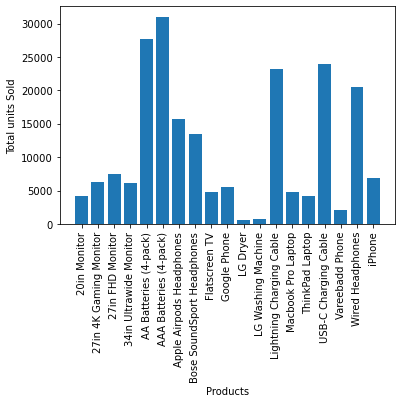

In [38]:
products = [prod for prod, df in all_data.groupby('Product')]

plt.bar(products, product_group)
plt.xticks(products, rotation='vertical')
plt.ylabel('Total units Sold')
plt.xlabel('Products')
#plt.grid()
plt.show()

#### Conclusion: AAA Batteries(4-pack) is the most sold product

### Adding the item price on the same graph on another axis

In [39]:
prices = all_data.groupby('Product').mean()['Price Each']
#print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


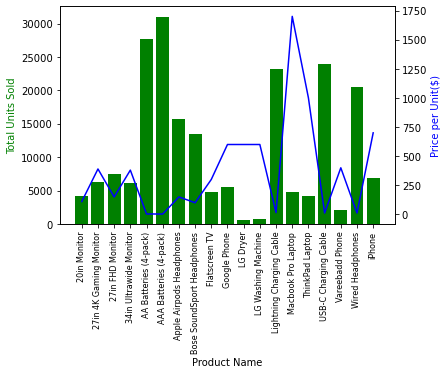

In [43]:
fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
ax1.bar(products, product_group, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Total Units Sold', color='g')
ax2.set_ylabel('Price per Unit($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

### This sums up our Data Analysis. __THANK YOU!__